In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from scipy.stats import zscore

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


# Introduction

In this project, we aim to analyze the World Happiness Report dataset and explore the factors that contribute to happiness across different countries. The dataset contains information about various indicators such as GDP per capita, social support, health life expectancy, freedom to make life choices, generosity, and perception of corruption. By analyzing this data, we can gain insights into the relationships between these factors and overall happiness.

## Data Preparation

To start our analysis, we first need to load and prepare the dataset. We will read the dataset from a CSV file and select the relevant columns for our analysis. Here's the code to accomplish this:

In [4]:
# Read the dataset from a CSV file
data = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')

In [5]:
# Take a look at the first 5 rows
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
# Look at the statistics
data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [7]:
# Check for null values and sum the total for each column
data.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [8]:
# Check for duplicates within our dataset
data.duplicated().any()

False

In [9]:
# See how many columns along with their data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [10]:
# Select the columns of interest
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [11]:
# Create a copy of the selected columns
data_copy = data[data_columns].copy()

In [12]:
# Rename the columns for clarity
happy_df = data_copy.rename(columns={
    'Country name': 'country_name',
    'Regional indicator': 'regional_indicator',
    'Ladder score': 'happiness_score',
    'Logged GDP per capita': 'logged_gpd_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'health_life_expectancy',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'perception_of_corruption'
})

# Select the desired columns for further analysis
happy_df = happy_df[['country_name', 'regional_indicator', 'happiness_score', 'logged_gpd_per_capita', 'social_support', 'health_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perception_of_corruption']]

In [13]:
# Look at the first 5 rows to ensure our change took place
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_gpd_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perception_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


## Exploratory Data Analysis

Now that we have our prepared dataset, let's perform some exploratory data analysis (EDA) to gain initial insights into the data. We will start by examining the summary statistics and visualizing the distribution of the variables. Here's the code to accomplish this:

In [14]:
# Calculate the number of bins using the square root of the data size
num_bins = int(np.sqrt(len(happy_df))) #1 + math.log2(len(happy_df))
print(num_bins)

12


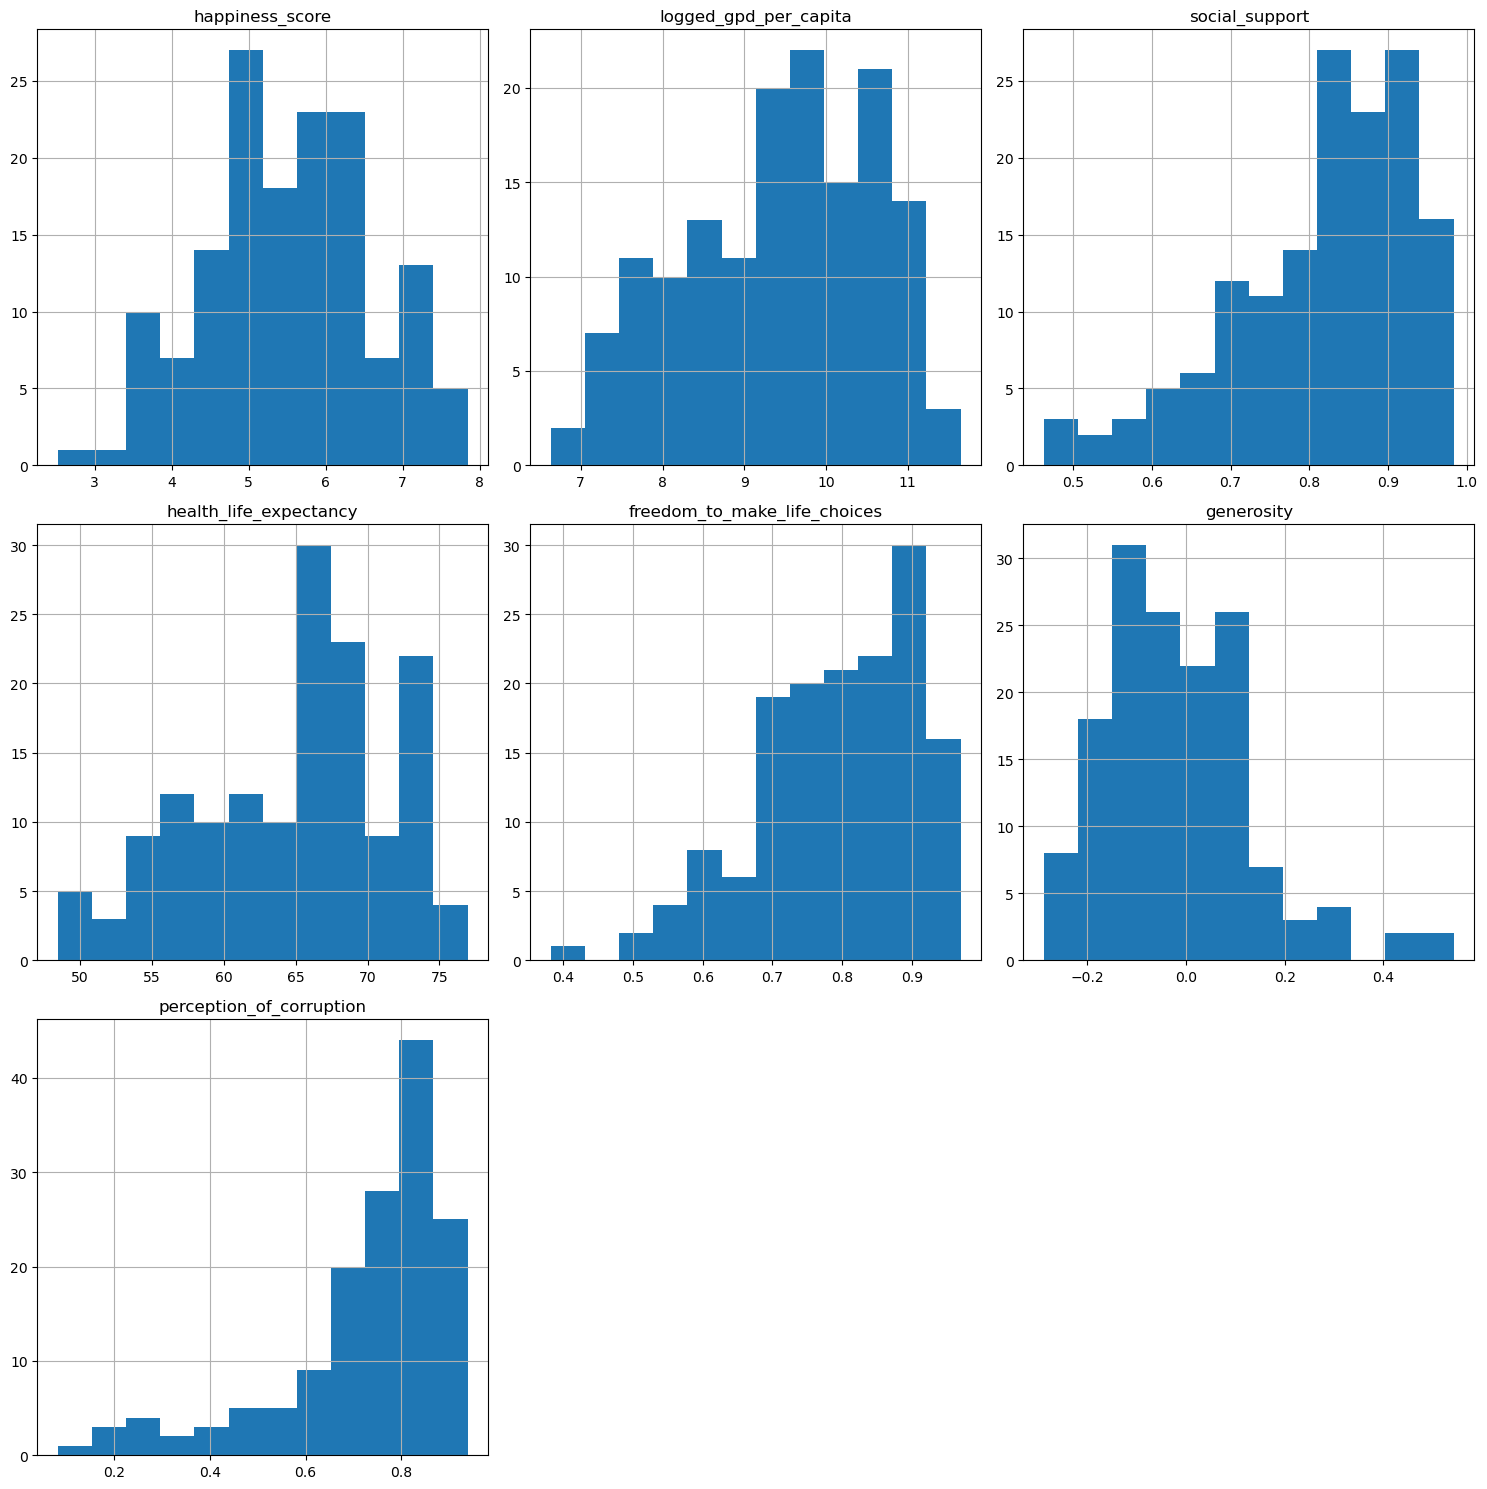

In [15]:
# Plot histograms for the numerical variables
happy_df.hist(figsize= (15, 15), bins=12)
plt.xticks(rotation=45, fontsize = 10) # rotate 45 degrees with 10 fontsize
plt.tight_layout()
plt.show()

The code above uses the `hist` function from matplotlib to create histograms for the numerical variables in our dataset. The number of bins is calculated using the square root of the data size to provide a suitable number of bins for visualization. The resulting histograms provide an overview of the distribution of each variable.

## Scatter Plot Analysis: Happiness Score vs GDP per Capita

In this section of our analysis, we have created a scatter plot to visualize the relationship between the Happiness Score and the logged GDP per Capita for countries in our dataset.

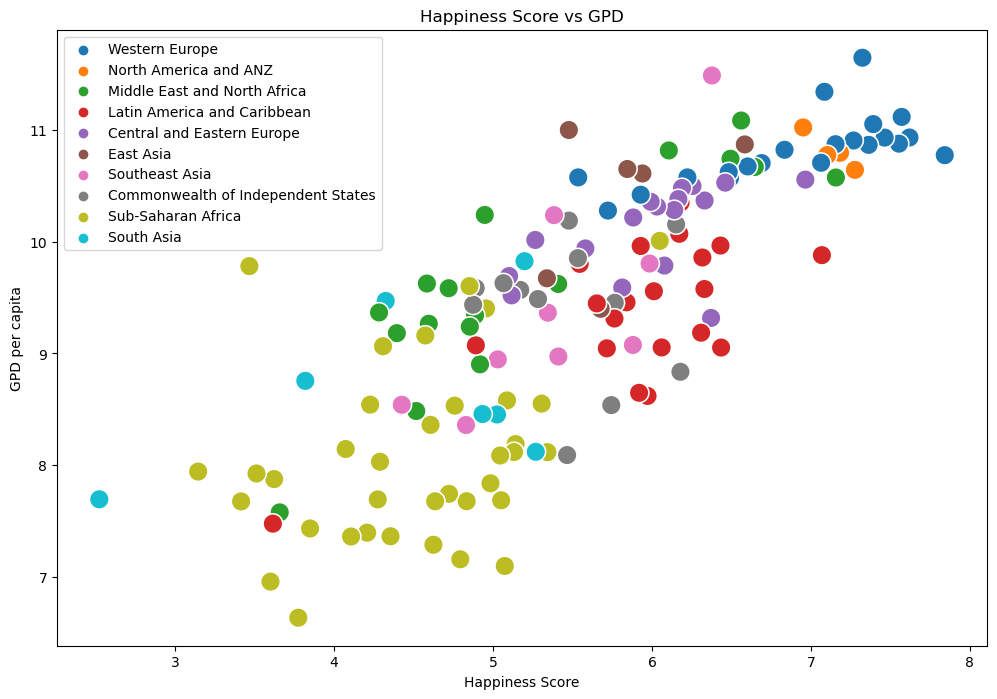

In [16]:
# Create a figure with a size of 12x8 inches
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.logged_gpd_per_capita, hue=happy_df.regional_indicator, s=200)

# Set the title of the plot
plt.title("Happiness Score vs GPD")

# Add a legend to the plot and position it in the upper left corner, with a font size of 10
plt.legend(loc="upper left", fontsize=10)

# Set the x-axis label
plt.xlabel("Happiness Score")

# Set the y-axis label
plt.ylabel("GPD per capita")

# Display the plot
plt.show()

Preliminary observations:

* Countries with high GDP per capita and high happiness scores: Countries with a logged GDP per capita of 9 or higher and a happiness score of 5 or higher are in the upper-right region of the scatter plot. These are typically wealthier countries with a relatively high self-reported level of well-being among their residents.

However, it's important to remember that correlation does not imply causation. While there appears to be a positive association between GDP per capita and happiness score, it doesn't necessarily mean that increasing a country's GDP per capita will directly increase its happiness score. The relationship could be influenced by other factors not included in this specific visualization.

Further analysis and statistical testing would be needed to explore these relationships in more depth and to account for other potential influencing factors.

Future steps:

Our next steps could include looking at the specific factors that contribute to the happiness score in more detail, such as social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. We could also investigate how these factors interact with GDP per capita and whether they help explain some of the observed variations in happiness scores between countries.

In [17]:
# Calculate the mean logged GPD per capita by region
gpd_region_mean = happy_df.groupby("regional_indicator")["logged_gpd_per_capita"].mean()

# Print the mean logged GPD per capita by region
print(gpd_region_mean)

regional_indicator
Central and Eastern Europe            10.109059
Commonwealth of Independent States     9.401833
East Asia                             10.367667
Latin America and Caribbean            9.370000
Middle East and North Africa           9.666118
North America and ANZ                 10.809500
South Asia                             8.682571
Southeast Asia                         9.421444
Sub-Saharan Africa                     8.075194
Western Europe                        10.822714
Name: logged_gpd_per_capita, dtype: float64


This table displays the average logged GDP per capita for various regions. GDP per capita is a measure of economic output per person and is often used as an indicator of living standards or economic well-being. The values are logged to manage skewness and better represent proportionate differences. Here's what the data suggests:

* Central and Eastern Europe: The average logged GDP per capita in this region is 10.109. This implies a relatively moderate level of economic output per person when compared to other regions.

* Commonwealth of Independent States: The average logged GDP per capita here is 9.402, which is lower than in Central and Eastern Europe, suggesting a somewhat lower economic output per person.

* East Asia: With an average logged GDP per capita of 10.368, East Asia is relatively high in economic output per person.

* Latin America and Caribbean: This region has an average logged GDP per capita of 9.37, indicating a moderate level of economic output per person.

* Middle East and North Africa: The average logged GDP per capita in this region is 9.666, which is relatively high compared to other regions.

* North America and ANZ (Australia and New Zealand): This region has the highest average logged GDP per capita of all the regions, at 10.81. This suggests a high level of economic output per person.

* South Asia: South Asia has the lowest average logged GDP per capita, at 8.683, indicating a lower level of economic output per person.

* Southeast Asia: This region has an average logged GDP per capita of 9.421, suggesting a moderate level of economic output per person.

* Sub-Saharan Africa: Sub-Saharan Africa has a relatively low average logged GDP per capita of 8.075, indicating a lower level of economic output per person.

* Western Europe: With an average logged GDP per capita of 10.823, Western Europe is among the regions with the highest economic output per person.

These figures suggest varying levels of economic output per person across the different regions. The higher a region's average logged GDP per capita, the higher its average economic output per person. However, it's important to remember that GDP per capita is not the only measure of well-being, and other factors like social support, health, freedom, corruption, and generosity also play crucial roles.

### Lets plot this data on a pie chart to get a better visualization.

Text(0, 0.5, '')

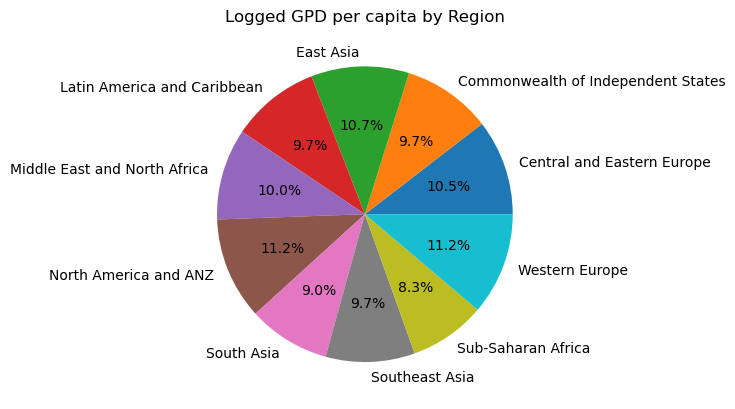

In [18]:
# Plot a pie chart of the mean logged GPD per capita by region
gpd_region_mean.plot.pie(autopct = "%1.1f%%")
plt.title("Logged GPD per capita by Region")
plt.ylabel("")

Next lets take a look at the number of countries by regional indicator.

In [19]:
# Group the dataframe by "regional_indicator" and count the number of countries in each group
total_countries = happy_df.groupby("regional_indicator")["country_name"].count()

# Print the total number of countries in each regional group
print(total_countries)

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64


This table shows the number of countries in each region:

This information provides an understanding of the distribution of countries across different regions in our dataset.

In [20]:
# Convert the 'logged_gpd_per_capita' and 'happiness_score' columns to numeric data type,
# replacing any non-numeric values with NaN
happy_df['logged_gpd_per_capita'] = pd.to_numeric(happy_df['logged_gpd_per_capita'], errors='coerce')
happy_df['happiness_score'] = pd.to_numeric(happy_df['happiness_score'], errors='coerce')

# Calculate the z-scores for the 'logged_gpd_per_capita' column
z_scores = zscore(happy_df['logged_gpd_per_capita'].dropna())

# Define the threshold for identifying outliers
threshold = 3

# Find the indices of the outliers based on the z-scores exceeding the threshold
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Get the rows corresponding to the outlier indices
outliers = happy_df.iloc[outlier_indices]

# Print the outliers
print(outliers)

Empty DataFrame
Columns: [country_name, regional_indicator, happiness_score, logged_gpd_per_capita, social_support, health_life_expectancy, freedom_to_make_life_choices, generosity, perception_of_corruption]
Index: []


In the above code snippet, we are performing outlier detection using the Z-score method on the 'logged_gpd_per_capita' column in the happy_df DataFrame. Here's an explanation of the steps:

1) Convert Data Types: We start by converting the 'logged_gpd_per_capita' and 'happiness_score' columns to numeric data types using the pd.to_numeric function. This ensures that the data is represented as numerical values for further analysis.

2) Calculate Z-Scores: Next, we calculate the Z-scores for the 'logged_gpd_per_capita' column using the zscore function from the scipy.stats module. The Z-score measures how many standard deviations each data point is from the mean of the distribution.

3) Define Threshold: We define a threshold value of 3, which is a commonly used threshold for identifying outliers. Data points with a Z-score greater than 3 or less than -3 are considered potential outliers.

4) Identify Outliers: Using the threshold, we determine the indices of the outliers by checking which data points have absolute Z-scores greater than the threshold. The np.where function is used to locate the indices of these outliers.

5) Extract Outliers: We extract the outlier rows from the happy_df DataFrame by indexing it with the outlier indices obtained in the previous step. The resulting DataFrame, outliers, contains the rows with potential outliers.

6) Print Outliers: Finally, we print the outliers DataFrame, which displays the rows with potential outliers in the 'logged_gpd_per_capita' column.

We did not find any outliers beyond 3 standard deviations from the mean.

In [21]:
corruption = happy_df.groupby("regional_indicator")["perception_of_corruption"].mean()
corruption

regional_indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: perception_of_corruption, dtype: float64

Let's plot this information on a bar chart to gain a better visual understanding of how corruption is distributed across different regions and to compare the perception of corruption levels.

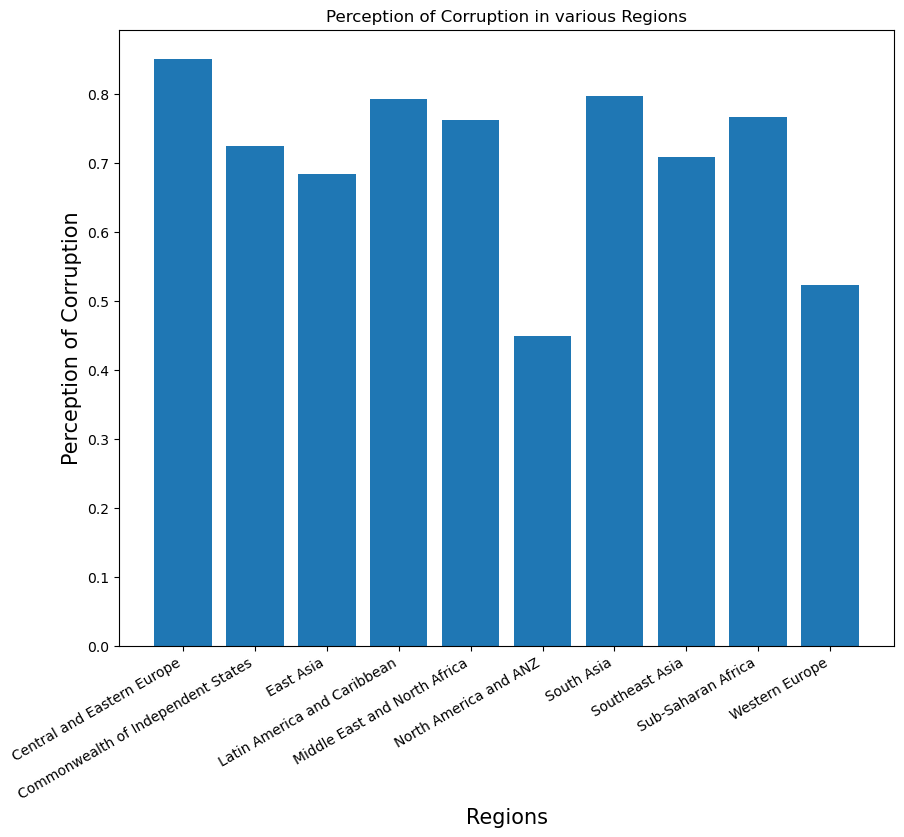

In [22]:
# Create a figure with a size of 10 by 8
plt.figure(figsize=(10, 8))

# Set the title of the plot
plt.title("Perception of Corruption in various Regions")

# Set the label for the x-axis with a font size of 15
plt.xlabel("Regions", fontsize=15)

# Set the label for the y-axis with a font size of 15
plt.ylabel("Perception of Corruption", fontsize=15)

# Rotate the x-axis labels by 30 degrees and align them to the right
plt.xticks(rotation=30, ha="right")

# Create a bar plot using the data from the 'corruption' index
plt.bar(corruption.index, corruption)

# Display the plot
plt.show()

## Bar Chart: Perception of Corruption in Various Regions

In this analysis, we have created a bar chart to visualize the `perception of corruption` in different `regions`. The chart displays the average perception of corruption scores for each region based on the `perception_of_corruption` variable in our dataset.

Preliminary observations:

* Central and Eastern Europe: This region has the highest average perception of corruption score, indicating a relatively higher perceived level of corruption compared to other regions.
* Commonwealth of Independent States: The average perception of corruption score is relatively high in this region, suggesting a significant perceived corruption issue.
* East Asia: The region exhibits a moderate average perception of corruption score, indicating a relatively lower perceived level of corruption compared to the above two regions.
* Latin America and Caribbean: This region also has a moderate average perception of corruption score, suggesting a moderate level of perceived corruption.
* Middle East and North Africa: The average perception of corruption score is relatively high in this region, indicating a significant perceived corruption issue.
* North America and ANZ (Australia and New Zealand): The region has the lowest average perception of corruption score, indicating a relatively lower perceived level of corruption compared to other regions.
* South Asia: This region exhibits a relatively high average perception of corruption score, suggesting a significant perceived corruption issue.
Southeast Asia: The region has a moderate average perception of corruption score, indicating a moderate level of perceived corruption.
* Sub-Saharan Africa: The average perception of corruption score is relatively high in this region, indicating a significant perceived corruption issue.
* Western Europe: This region has the lowest average perception of corruption score among the regions, indicating a relatively lower perceived level of corruption.

The bar chart provides a visual representation of the differences in perceived corruption levels across the various regions. It helps us understand the relative rankings of regions in terms of corruption perception and provides insights into the variations in perceived corruption levels.

In [23]:
# Get top 10 and bottom 10 countries
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

/tmp/ipykernel_32/1520590999.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')  # Get a colormap with 10 different colors


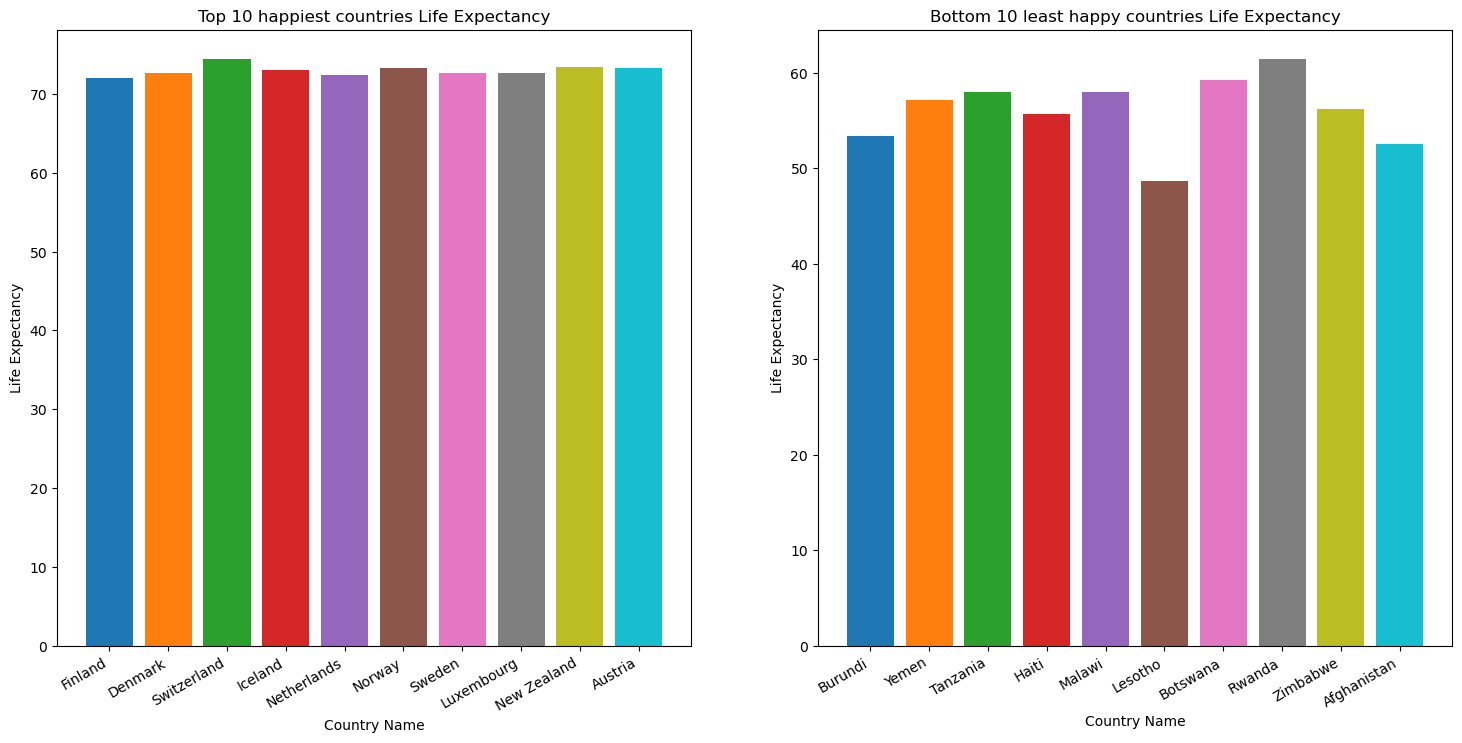

In [24]:
# import libraries
import matplotlib.pyplot as plt
from matplotlib import cm


cmap = cm.get_cmap('tab10')  # Get a colormap with 10 different colors

# create a figure with width and height
plt.figure(figsize=(18, 8))

# Create the first subplot for the top 10 happiest countries' life expectancy
plt.subplot(1, 2, 1)
plt.bar(top_10.country_name, top_10.health_life_expectancy, color=cmap.colors[:len(top_10)])
plt.title("Top 10 happiest countries Life Expectancy")
plt.xlabel("Country Name")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=30, ha='right') # Rotate x-axis labels by 30 degrees and align them to the right

# Create the second subplot for the bottom 10 least happy countries' life expectancy
plt.subplot(1, 2, 2)
plt.bar(bottom_10.country_name, bottom_10.health_life_expectancy, color=cmap.colors[:len(bottom_10)])
plt.title("Bottom 10 least happy countries Life Expectancy")
plt.xlabel("Country Name")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=30, ha='right') # Rotate x-axis labels by 30 degrees and align them to the right

# show the subplot
plt.show()

## Top 10 vs Bottom 10 countries Life Expectancy:

In this analysis, we have explored the relationship between happiness and life expectancy in different countries. By examining the top 10 happiest countries and the bottom 10 least happy countries, we gain insights into how happiness levels correlate with life expectancy.

The visualization reveals that the top 10 countries have a life expectancy above the age of 70, indicating that people in these countries tend to live longer. Conversely, the bottom 10 countries have a life expectancy below 70, suggesting lower life expectancies for their populations. This observation highlights the positive association between happiness and life expectancy, suggesting that happier countries tend to have healthier and longer-living populations.

This analysis reinforces the notion that happiness plays a vital role in overall well-being, not only influencing subjective experiences but also contributing to physical health and longevity. The findings underscore the importance of fostering happiness as a key factor in promoting healthier societies and longer life expectancies.


#### Lets look at Happiness Score and Logged GDP per capita and see if they follow a normal distribution.


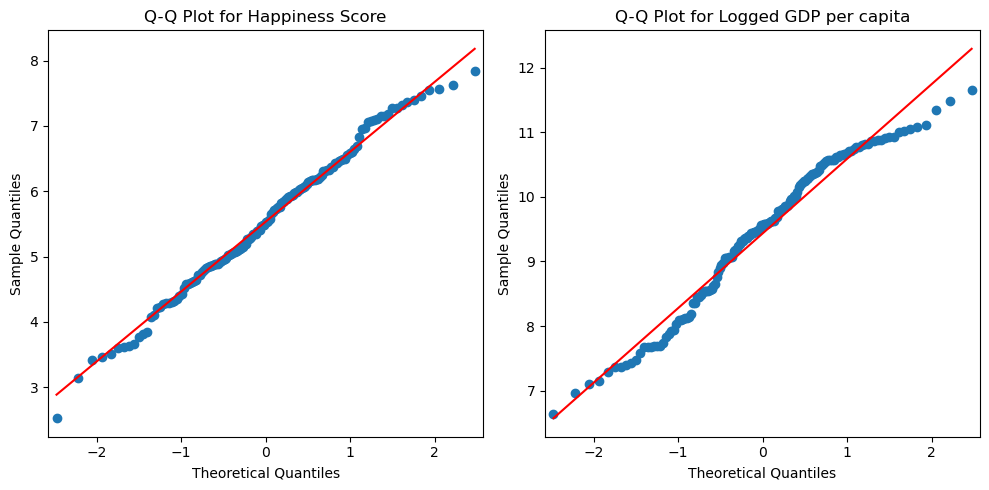

In [25]:
# create a figure with to subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Q-Q plot for 'logged_gpd_per_capita'
sm.qqplot(happy_df['happiness_score'], line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot for Happiness Score')

# Q-Q plot for 'happiness_score'
sm.qqplot(happy_df['logged_gpd_per_capita'], line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot for Logged GDP per capita')

# adjust the spacing to prevent overlap
plt.tight_layout()
plt.show()

In the code above, we create Q-Q plots to assess the distributional properties of the 'happiness_score' and 'logged_gpd_per_capita' variables. Q-Q plots are graphical tools that help compare the quantiles of a dataset against the quantiles of a known theoretical distribution (in this case, a straight line representing a normal distribution). The closer the data points are to the reference line, the more closely the data follow a normal distribution.

We can see the Q-Q plots follow a normals standard deviation by how close the dots are to the line.

## Correlation Coeficent Scatter Plot

Next, let's calculate the correlation coefficient and create a scatter plot to visualize the relationship between logged GDP per capita and happiness score:

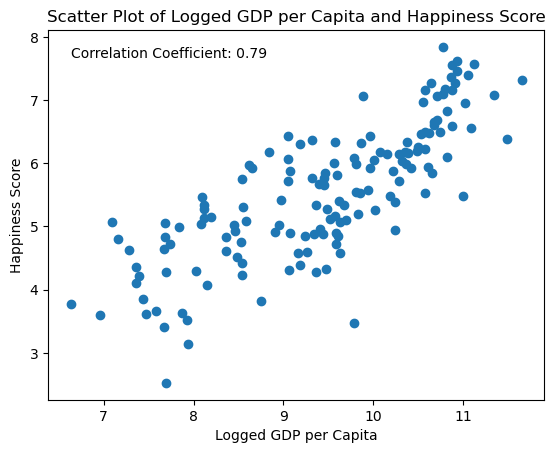

In [26]:
x = happy_df['logged_gpd_per_capita']
y = happy_df['happiness_score']

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(x, y)[0, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.title('Scatter Plot of Logged GDP per Capita and Happiness Score')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score')

# Include the correlation coefficient in the plot
plt.text(x.min(), y.max(), f'Correlation Coefficient: {corr_coeff:.2f}', ha='left', va='top')

# Display the plot
plt.show()

The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. In our analysis, we calculated a correlation coefficient of 0.79 between the logged GDP per capita and happiness score.

A correlation coefficient value of `0.79` indicates a strong positive correlation between these two variables. This means that as the logged GDP per capita increases, there tends to be an increase in the happiness score of a country, and vice versa. The scatter plot visually represents this positive relationship, with the data points generally following an upward trend.

The high correlation between logged GDP per capita and happiness score suggests that economic factors play a significant role in determining the level of happiness reported by individuals in a country. Countries with higher levels of economic output per person are more likely to have higher happiness scores, indicating a higher level of subjective well-being among their residents.

## Heatmap Correlation

Let's create a heatmap to visualize the correlation matrix between all the variables in the DataFrame:

/tmp/ipykernel_32/3360494332.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = happy_df.corr(method="pearson")


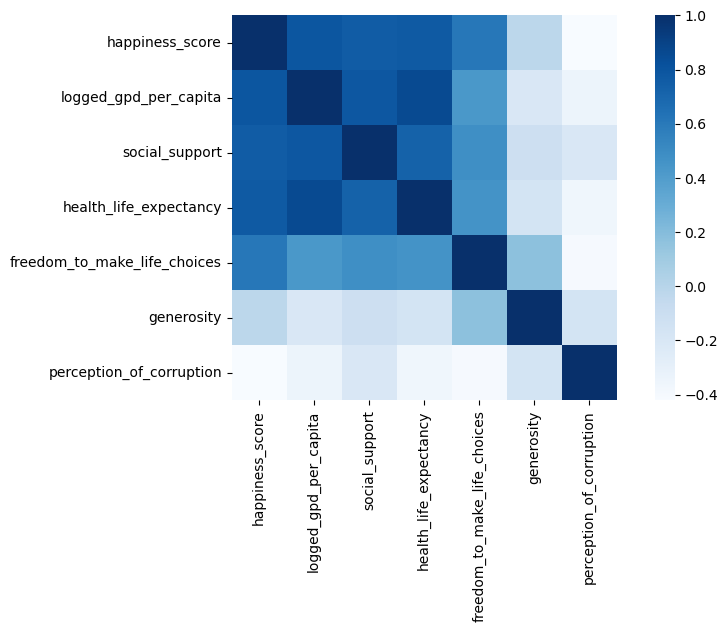

In [27]:
# create variable cor to hold our correlation caulation using the pearson method
cor = happy_df.corr(method="pearson")

# create a figure and axis object with width and height
fig, ax = plt.subplots(figsize=(10, 5))

# plot the heatmap to visualize the correlation
heatmap = sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool_),
                      cmap="Blues", square=True, ax=ax)

The heatmap provides a visual representation of the correlation matrix, allowing us to quickly identify the strength and direction of correlations between different variables. Here's an overview of the heatmap analysis:

One of the strongest positive correlations observed in the heatmap is between the `happiness score` and the `logged GDP per capita`, with a correlation coefficient of approximately `0.79`. The darker blue color in this cell indicates a strong positive correlation, suggesting that as the logged GDP per capita increases, the happiness score tends to increase as well. This finding reinforces the notion that economic prosperity is often associated with higher levels of happiness.

Conversely, we notice a negative correlation between the `happiness score` and the `perception of corruption`, as indicated by the lighter blue/white color in their corresponding cell. This negative correlation makes intuitive sense because higher levels of perceived corruption tend to be associated with lower levels of happiness. In other words, when people perceive a higher degree of corruption in their society, it can have a negative impact on their overall happiness.

By examining the various cells in the heatmap, we can gain insights into the relationships between different variables. The darker blue cells indicate positive correlations, meaning that as one variable increases, the other tends to follow in the same direction. On the other hand, the lighter blue or white cells represent negative correlations, suggesting that as one variable increases, the other tends to decrease.

Overall, the heatmap analysis helps us identify the strength and direction of correlations between variables, providing a valuable tool for understanding the relationships within our dataset. It reinforces the importance of economic factors, such as GDP per capita, in contributing to happiness, while also highlighting the negative impact of corruption on overall well-being.

Lets plot a few of these below to demonstrate futher. Lets plot the following:

* Happiness Score vs Health Life Expectancy
* Happiness Score vs Perception of Corruption

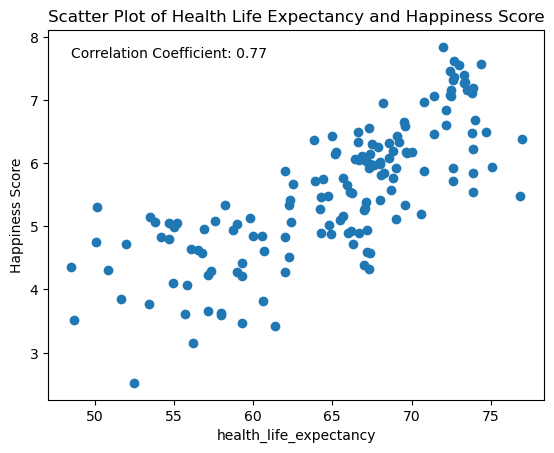

In [28]:
# define our x and y on the axis
x = happy_df['health_life_expectancy']
y = happy_df['happiness_score']

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(x, y)[0, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.title('Scatter Plot of Health Life Expectancy and Happiness Score')
plt.xlabel('health_life_expectancy')
plt.ylabel('Happiness Score')

# Include the correlation coefficient in the plot
plt.text(x.min(), y.max(), f'Correlation Coefficient: {corr_coeff:.2f}', ha='left', va='top')

# Display the plot
plt.show()

### Happiness Score vs Health Life Expectancy (correlation coefficient: 0.77): 

This scatter plot represents the relationship between the `happiness score` and the `health life expectancy` of countries. The positive correlation coefficient of `0.77` indicates a strong positive relationship between these variables. As the health life expectancy increases, the happiness score tends to increase as well. This suggests that countries with higher life expectancies generally report higher levels of happiness among their residents.

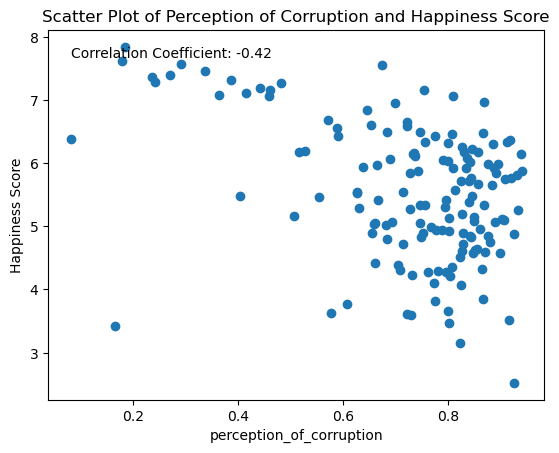

In [29]:
# define our x and y on the axis
x = happy_df['perception_of_corruption']
y = happy_df['happiness_score']

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(x, y)[0, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.title('Scatter Plot of Perception of Corruption and Happiness Score')
plt.xlabel('perception_of_corruption')
plt.ylabel('Happiness Score')

# Include the correlation coefficient in the plot
plt.text(x.min(), y.max(), f'Correlation Coefficient: {corr_coeff:.2f}', ha='left', va='top')

# Display the plot
plt.show()

### Happiness Score vs Perception of Corruption (correlation coefficient: -0.42): 

This scatter plot explores the relationship between the `happiness score` and the `perception of corruption`. The `negative` correlation coefficient of `-0.42` indicates a moderate negative relationship between these variables. As the perception of corruption increases (indicating a higher perceived level of corruption), the happiness score tends to decrease. This finding implies that corruption can have a detrimental impact on the overall happiness of a country's population.

By visualizing these scatter plots, we can gain a clearer understanding of the relationships between the happiness score and other variables. The positive correlation between happiness and health life expectancy highlights the importance of good health and well-being in promoting happiness. Conversely, the negative correlation between happiness and perception of corruption underscores the negative influence of corruption on happiness levels.

These additional scatter plots serve to reinforce the correlation analysis and provide further evidence of the relationships between variables in our dataset.

Now that we have determined several variables that potential lead to happier life, lets take a look to see if we can predict the Happiness of people based on our data set.


## Machine Learning

Now that we have identified the variables that have a significant impact on happiness, it's time to explore how we can predict happiness based on these variables using our dataset. We will follow a structured approach that includes the following steps:

* Feature Selection: We will select the most relevant features that have a strong influence on predicting happiness. This will help streamline the model and improve its accuracy.

* Splitting Data into Training and Testing Sets: The dataset will be divided into two subsets: one for training the model and one for evaluating its performance.

* Choosing a Machine Learning Algorithm: We will select an appropriate machine learning algorithm that is suitable for predicting happiness based on our dataset. This could include regression, decision trees, or other algorithms.

* Model Training: The selected machine learning algorithm will be trained on the training dataset, allowing it to learn the patterns and relationships between the input variables and happiness.

* Model Evaluation: We will assess the performance of the trained model using the testing dataset. This will provide insights into how well the model can predict happiness based on the selected variables.

* Conclusion: Based on the results of our machine learning model, we will draw conclusions about the effectiveness of using these variables to predict happiness. We will also identify any limitations or areas for further improvement.

By following this structured approach, we aim to develop a predictive model that can accurately forecast happiness levels based on the available variables in our dataset.

In [30]:
# define the columns we are interested in
feature_columns = ['happiness_score','logged_gpd_per_capita', 'social_support', 'health_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perception_of_corruption']

# a new variable that stores the columns we are interested in
model_data = happy_df[feature_columns]

# print out the data
model_data

,happiness_score,logged_gpd_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perception_of_corruption
0,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...
144,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [39]:
# import libraries
import statsmodels.api as sm
from statsmodels.tools import add_constant

# add constant to variable X
X = add_constant(X)

# create the model
model = sm.OLS(y, X)

# fit the model
result = model.fit()

# print the results along with a summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     73.27
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           5.06e-41
Time:                        21:22:58   Log-Likelihood:                -116.50
No. Observations:                 149   AIC:                             247.0
Df Residuals:                     142   BIC:                             268.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Interpretation of Linear Regression Results

The OLS regression model uses `happiness_score` as the dependent variable, which we aim to predict. Our independent variables, or predictors, include `logged_gpd_per_capita`, `social_support`, `health_life_expectancy`, `freedom_to_make_life_choices`, `generosity`, and `perception_of_corruption`.

#### R-squared

The model's R-squared is 0.756, meaning that approximately `75.6%` of the variability in happiness scores can be explained by our predictors. This is a relatively high value and suggests that our model explains a substantial part of the happiness score.

#### Model Coefficients

The coefficients table shows us the estimated change in the happiness score for a one-unit change in each predictor while keeping other predictors constant.

For instance, for every one-unit increase in `logged GDP per capita`, the `happiness score` increases by `0.2795`, holding all else constant. This indicates a positive relationship between a country's economic production and its reported happiness score.

In terms of social support, the happiness score increases by `2.4762` for every unit increase in social support, again keeping all else constant. This suggests that the more social support people feel they have, the higher their perceived happiness.

#### Statistical Significance

All predictors, with the exception of `generosity`, show a p-value of less than `0.05`, indicating they are statistically significant in predicting the happiness score. The `generosity` predictor has a p-value of `0.259`, which exceeds `0.05`, and therefore, we can't conclude that this variable significantly influences the happiness score in our model.

In [40]:
# import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF (Variance Inflation Factor) for each variable
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [41]:
# combine the X columns along with respected VIF predictor
pd.DataFrame(list(zip(list(X.columns), vif)))

,0,1
0,const,201.820597
1,logged_gpd_per_capita,5.104890
2,social_support,2.972200
3,health_life_expectancy,4.099348
4,freedom_to_make_life_choices,1.585807
5,generosity,1.180982
6,perception_of_corruption,1.367122


## Variance Inflation Factor (VIF)

The `VIF` is a measure of multicollinearity, indicating how much the variance of the estimated regression coefficients are increased due to multicollinearity. It appears that `logged_gpd_per_capita` shows a relatively high VIF value `(5.104890)`. This might suggest that this variable is not providing unique information in the presence of other variables, indicating a possible multicollinearity issue.

Potential Issues

The condition number of the model is quite large `(1.15e+03 or 1150)`, indicating potential multicollinearity or numerical problems. The high VIF for `logged_gpd_per_capita` supports this. It may be beneficial to investigate the relationships between predictors or consider removing or transforming variables to mitigate this.

## Conclusion

Our analysis aimed to identify the factors influencing happiness scores. The model we employed explains approximately `75.6%` of the variance in `happiness scores`, which suggests a strong explanatory power.

Several predictors in our model emerged as significant factors influencing happiness scores. Specifically, these include `logged GDP per capita`, `social support`, `health life expectancy`, `freedom to make life choices`, and the `perception of corruption`. This suggests that a combination of economic, social, and governance factors collectively shape happiness scores.

It's noteworthy that an increase in social support and freedom to make life choices had particularly substantial impacts on happiness scores. This highlights the importance of societal structures and personal freedoms in contributing to happiness.

Interestingly, generosity did not emerge as a significant predictor in our model. This may indicate that while generosity is a positive attribute, it may not independently or directly influence people's perception of their happiness when considering the presence of other factors.

However, we note potential multicollinearity concerns, especially with the logged GDP per capita. This indicates that the influence of economic output on happiness scores may not be entirely separate from the effects of other variables in the model. Care must be taken when interpreting these results, and further study could consider addressing this issue.

Overall, these findings provide valuable insights into the factors that contribute to happiness. Policymakers aiming to improve societal happiness may want to focus on improving social support structures, enhancing personal freedoms, ensuring good governance to decrease corruption perceptions, and fostering a healthy economic environment.